In [10]:
import numpy as np
import pylab as plt
from matplotlib.colors import LogNorm

from example import ExampleProblem
import svdunfold

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True

exampleProblem = ExampleProblem()
exampleProblem.set_bins_x_ini(28, -35, 25)
exampleProblem.set_bins_b_ini(28, -35, 25)
exampleProblem.setup_example()

print("bins in x:", exampleProblem.n_bins_x)
#print("bins x: ", exampleProblem.bins_x, "\nbin centers x: ", exampleProblem.bin_centers_x)
print("bins in b:", exampleProblem.n_bins_b)
#print("bins b: ", exampleProblem.bins_b, "\nbin centers b: ", exampleProblem.bin_centers_b)

bins in x: 28
bins in b: 28


scale_factor:  0.015
2122875.000000003 2142855.0000000033
42857.14285714292 21420.00000000003


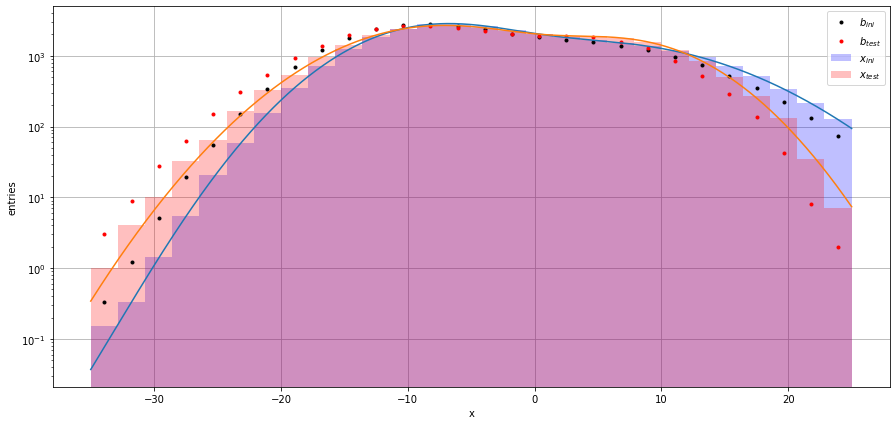

In [11]:
#%matplotlib notebook

x_ini_gen = exampleProblem.get_initial_MC()
x_ini = np.histogram(x_ini_gen, exampleProblem.bins_x)
x_test_gen = exampleProblem.get_test_distribution()
x_test = np.histogram(x_test_gen, exampleProblem.bins_x)

scale_factor = len(x_test_gen)/len(x_ini_gen)
print("scale_factor: ", scale_factor)

b_ini_gen = exampleProblem.get_initial_MC_data()
b_ini = np.histogram(b_ini_gen, exampleProblem.bins_b)
b_test_gen = exampleProblem.get_test_data()
b_test = np.histogram(b_test_gen, exampleProblem.bins_b)

plt.figure(figsize=(15, 7))

plt.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="blue", 
         label="$x_{ini}$", alpha=0.25, weights=scale_factor*np.ones(len(x_ini_gen)))
plt.hist(x_test_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="red", label="$x_{test}$", alpha=0.25)
plt.plot(exampleProblem.bin_centers_b, b_ini[0]*scale_factor, ".", color="black", label="$b_{ini}$")
plt.plot(exampleProblem.bin_centers_b, b_test[0], ".", color="red", label="$b_{test}$")

plt.xlabel("x")
plt.ylabel("entries")
plt.legend()
x = np.linspace(exampleProblem.bins_x[0], exampleProblem.bins_x[-1], 1000)
plt.plot(x, exampleProblem.true_distribution(x)*scale_factor)
plt.plot(x, exampleProblem.test_distribution(x))
plt.yscale("log")
plt.show()

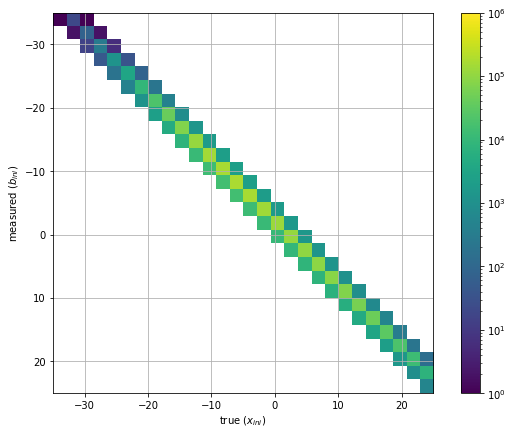

In [12]:
#%matplotlib notebook
A = exampleProblem.get_response_matrix()[0].T

plt.figure(figsize=(10, 7))

plt.imshow((A), norm=LogNorm(vmin=1, vmax=1e6), \
           extent=[exampleProblem.bins_x[0], exampleProblem.bins_x[-1],exampleProblem.bins_b[-1],exampleProblem.bins_b[0]])
plt.xlabel("true ($x_{ini}$)")
plt.ylabel("measured ($b_{ini}$)")
plt.colorbar()
plt.show()

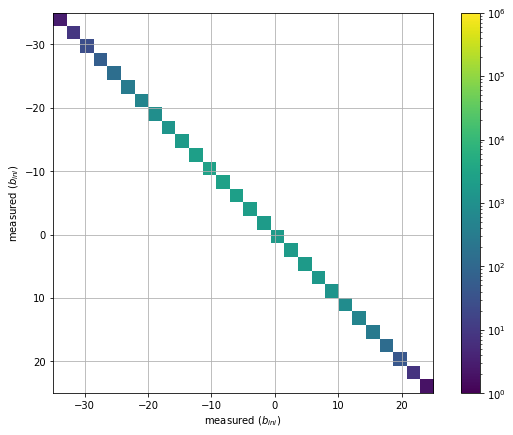

In [13]:
#%matplotlib notebook

B = exampleProblem.get_test_data_covariance()

plt.figure(figsize=(10, 7))

plt.imshow(B, norm=LogNorm(vmin=1, vmax=1e6), \
           extent=[exampleProblem.bins_b[0], exampleProblem.bins_b[-1],exampleProblem.bins_b[-1],exampleProblem.bins_b[0]])
plt.colorbar()
plt.xlabel("measured ($b_{ini}$)")
plt.ylabel("measured ($b_{ini}$)")
plt.show()

Text(0, 0.5, 'log|d|')

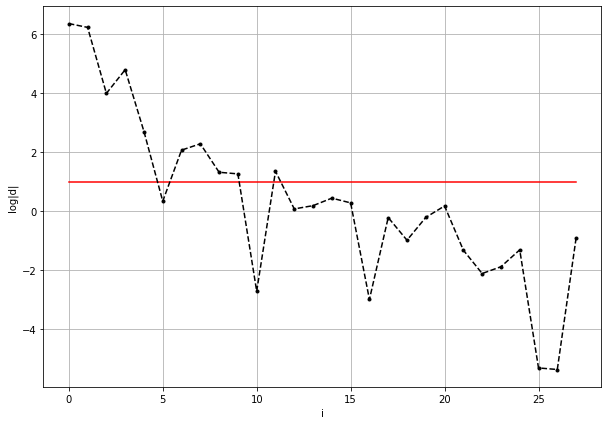

In [14]:
#%matplotlib notebook

unfold = svdunfold.SVDunfold(x_ini, b_test, A, B)
unfold.transform_system()
d = unfold.get_abs_d()

plt.figure(figsize=(10, 7))

plt.plot(np.arange(len(d)), np.ones(len(d)), "r-" )
plt.plot(np.arange(len(d)), d, "k.--")
plt.xlabel("i")
plt.ylabel("log|d|")

Text(0.5, 0, 'i')

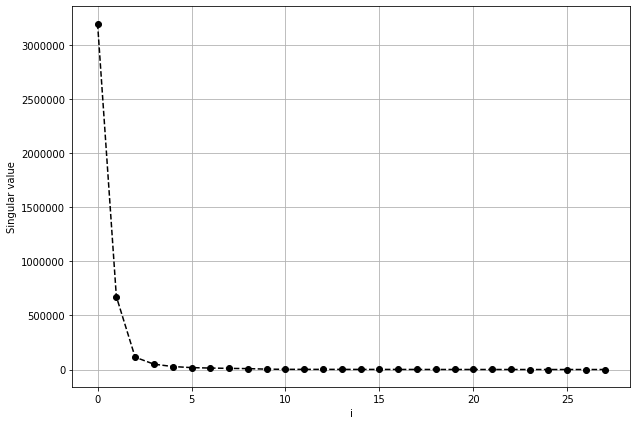

In [15]:
#%matplotlib notebook

s = unfold.get_singular_values()

plt.figure(figsize=(10, 7))

plt.plot(np.arange(len(s)), s, "ko--")
plt.ylabel("Singular value")
#plt.yscale("log")
plt.xlabel("i")

2122875.000000003 2142855.0000000033
42857.14285714292 21420.00000000003


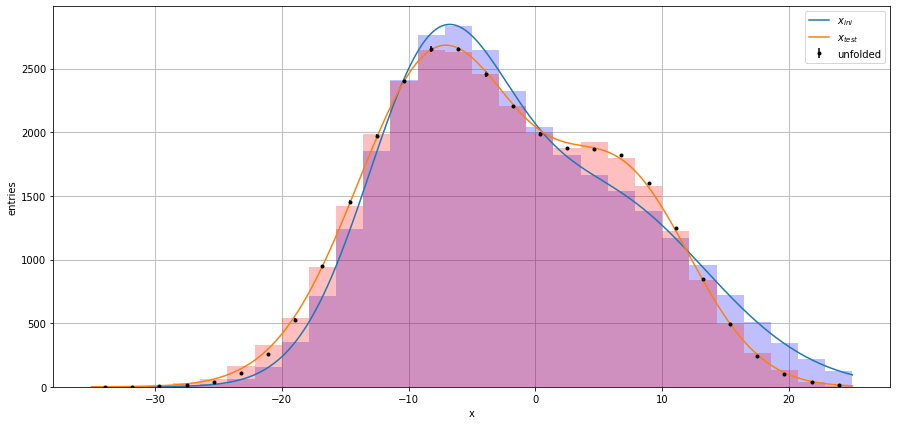

In [17]:
#%matplotlib notebook

unfold.unfold(10)

x = unfold.get_unfolded_distribution()
X = unfold.get_unfolded_cov_matrix()

plt.figure(figsize=(15, 7))

plt.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="blue", 
         alpha=0.25, weights=scale_factor*np.ones(len(x_ini_gen)))
plt.hist(x_test_gen, density=False, bins=exampleProblem.bins_x, histtype="stepfilled", color="red", alpha=0.25)
plt.errorbar(exampleProblem.bin_centers_x, x, fmt="k.", yerr=np.sqrt(np.diagonal(X)), label="unfolded")
x = np.linspace(exampleProblem.bins_x[0], exampleProblem.bins_x[-1], 1000)
plt.plot(x, exampleProblem.true_distribution(x)*scale_factor, label="$x_{ini}$")
plt.plot(x, exampleProblem.test_distribution(x), label="$x_{test}$")
plt.xlabel("x")
plt.ylabel("entries")
#plt.yscale("log")
plt.legend()